## Installation

In [ ]:
# speechbrain (used for speaker embedding)
!pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
!pip install -qq speechbrain==0.5.12

# pyannote.audio (used for speaker diarization)
!pip install -qq pyannote.audio==2.1.1

# OpenAI whisper (used for automatic speech recognition)
!pip install -qq git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 3.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.8/496.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 50.7 MB/s eta 0:00:00
    

## File Upload

In [ ]:
# upload an audio file (might not work for large files)
import google.colab
audio_file = list(google.colab.files.upload())[0]

Saving testing_audio.wav to testing_audio.wav


## Speaker diarization



In [ ]:
# log in on Huggingface hub (where pretrained pyannote models are hosted)
from huggingface_hub import notebook_login
notebook_login()

* Visit [hf.co/pyannote/speaker-diarization](https://hf.co/pyannote/speaker-diarization) and accept user conditions to use the model in our code
* Visit [hf.co/pyannote/segmentation](https://hf.co/pyannote/segmentation) and accept user conditions to use the model in our to code

In [ ]:
# load pyannote.audio speaker diarization
from pyannote.audio import Pipeline
speaker_diarization = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1",
                                               use_auth_token=True)

(…)aker-diarization/resolve/2.1/config.yaml:   0%|          | 0.00/500 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

(…)segmentation/resolve/2022.07/config.yaml:   0%|          | 0.00/318 [00:00<?, ?B/s]

(…)a-voxceleb/resolve/main/hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

(…)eleb/resolve/main/mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

(…)-voxceleb/resolve/main/label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
# apply speaker diarization
who_speaks_when = speaker_diarization(audio_file,
                                      num_speakers=None,  # these values
                                      min_speakers=None,  # can be modified by the user
                                      max_speakers=None)  # when they are known

In [ ]:
# reset notebook visualization (including start time, end time and speaker colors)
from pyannote.core import notebook
notebook.reset()

from pyannote.core import Segment
notebook.crop = Segment(0, 200)

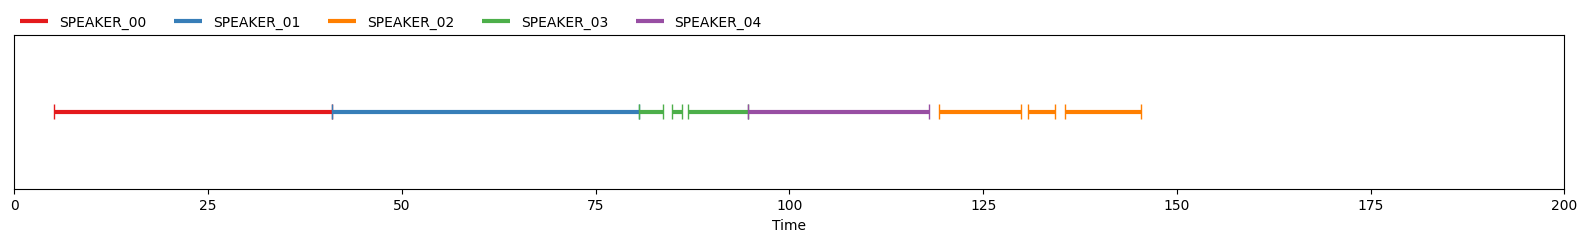

In [ ]:
who_speaks_when

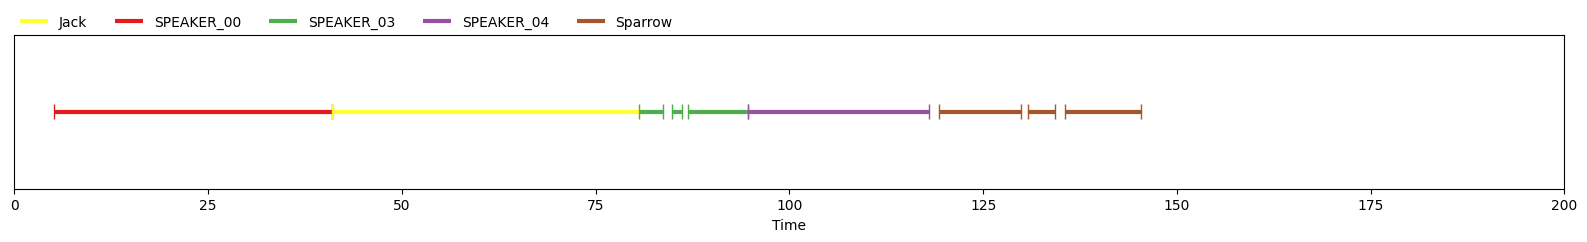

In [ ]:
# rename speakers if you know their name
who_speaks_when = who_speaks_when.rename_labels({"SPEAKER_01": "Jack", "SPEAKER_02": "Sparrow"})
who_speaks_when

## Transcription

In [ ]:
# load OpenAI Whisper automatic speech transcription
import whisper

# choose among "tiny", "base", "small", "medium", "large"
# go to https://github.com/openai/whisper/ to see other
model = whisper.load_model("small")

100%|███████████████████████████████████████| 461M/461M [00:08<00:00, 55.5MiB/s]


In [ ]:
# transcribing two minutes
from pyannote.core import Segment
first_minute = Segment(0, 120)

from pyannote.audio import Audio
audio = Audio(sample_rate=16000, mono=True)

for segment, _, speaker in who_speaks_when.crop(first_minute).itertracks(yield_label=True):
    waveform, sample_rate = audio.crop(audio_file, segment)
    text = model.transcribe(waveform.squeeze().numpy())["text"]
    print(f"{segment.start:06.1f}s {segment.end:06.1f}s {speaker}: {text}")

0005.2s 0041.0s SPEAKER_00:  I think if you're a leader and you don't understand the terms that you're using, that's probably the first start. It's really important that as a leader in the organisation you understand what digitisation means, you take the time to read widely in the sector. There are a lot of really good books. Kevin Kelly, who started Wired Magazine, has written a great book on various technologies. I think understanding the technologies, understanding what's out there so that you can separate the hype from the hope is really an important first step. And then making sure you understand the relevance of that for your function and how that fits into your business is the second step.
0041.0s 0080.6s Jack:  I think two simple suggestions. One is I love the phrase brilliant at the basics, right? So how can you become brilliant at the basics? But beyond that, the fundamental thing I've seen which hasn't changed is so few organizations as a first step have truly taken control 